[7.77836711e-09 8.50133686e-09 8.54628781e-09 8.40287812e-09
 8.25817093e-09 8.21567342e-09 8.37899301e-09 8.22988194e-09
 8.19026216e-09 8.22045228e-09 7.97195278e-09]


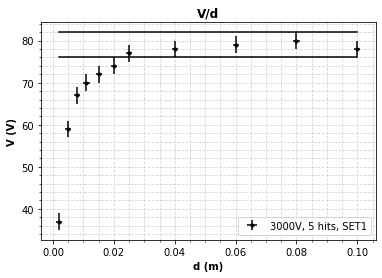

Q1
7.9e-09
Q fittato ed errore
[8.25269575e-09]
[5.47148133e-11]


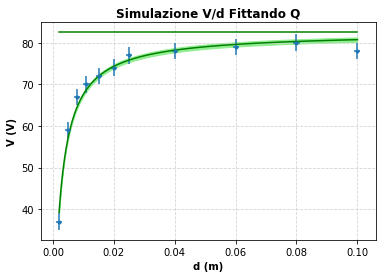

In [4]:
#ANALISI V/d DIELETTRICO


import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

Verr = 2
V = np.array([37,59,67,70,72,74,77,78,79,80,78])

d = np.array([0.002,0.005,0.008,0.011,0.015,0.02,0.025,0.04,0.06,0.08,0.1])
derr = 0.001





eps0 = 8.859E-12
DBacchetta = 0.0320

Dc = 0.178
Dcerr = 0.0005
#Dc = Dc-np.random.normal(0, Dcerr, 1)
#Dc = 

A = np.pi/4*Dc**2
A_err = A*2*Dcerr/Dc

Ce = 27e-12
Ce = 1e-10
D1 = 0.09945
D2 = 0.14575
D2 = 0.1492

D1err = 0.0001
D2err = 0.003
L = 0.1554
Lerr = 0.0001



b = eps0*A
berr = b*A_err/A



Qvalues = (b/d+Ce)*V

print(Qvalues)


#GRAFICO1 V/d 


fig = plt.figure()
ax = fig.gca()
#ax.set_xticks(np.arange(0, max(d)*1.2, (max(d)-min(d))/5))
#ax.set_yticks(np.arange(20, 90, (ymax-min(V))/5))
#plt.xlim(0,max(d)*1.2)
#plt.ylim(20, 90)
plt.grid(color='lightgray',linestyle="--",zorder=0)


plt.title("V/d",fontweight="bold")
plt.xlabel("d (m)",fontweight="bold")
plt.ylabel("V (V)",fontweight="bold")
plt.errorbar(d, V, xerr=derr, markersize=3,yerr=Verr, fmt='o', color="black", label="3000V, 5 hits, SET1")

x = np.linspace(min(d),max(d),1000)
ymax = np.ones(1000)*82
ymin = np.ones(1000)*76

Q1 = 79*Ce
Q1_err = 3*Ce

plt.plot(x,ymax,  color="black")
plt.plot(x,ymin,  color="black")


plt.legend(loc="lower right")
plt.minorticks_on()
plt.grid(True,"minor",linestyle="--",color='lightgray')

plt.show()



print("Q1")
print(Q1)

#V1 fit

from scipy.optimize import curve_fit

def fitobjective(x,Q):
	return Q/((eps0*A/x)+(Ce))
guess = np.array([Q1])

popt,pcov = curve_fit(fitobjective, d, V,p0=guess)
err = np.sqrt(np.diag(pcov))
Q_fit_err = err
Q_fit = popt
print("Q fittato ed errore")
print(Q_fit)
print(Q_fit_err)



x = np.linspace(min(d),max(d),1000)
y = fitobjective(x, Q_fit)

yAsynth = np.ones(1000)*Q_fit/Ce
ymax = yAsynth[0]+yAsynth[0]/10

fig = plt.figure()
ax = fig.gca()
plt.grid(color='lightgray',linestyle="--",zorder=0)

plt.plot(x, y, '-', color='green')
plt.plot(x, yAsynth, '-', color='green')

x_err_min = fitobjective(x,Q_fit-Q_fit_err);# 3 sigma errore
x_err_max = fitobjective(x,Q_fit+Q_fit_err);# 3 sigma errore
plt.fill_between(x,x_err_min,x_err_max, color="lightgreen",zorder=1)

plt.title("Simulazione V/d Fittando Q",fontweight="bold")
plt.xlabel("d (m)",fontweight="bold")
plt.ylabel("V (V)",fontweight="bold")
plt.errorbar(d, V, xerr=derr, yerr=Verr, fmt='.')

plt.show()

